In [65]:
import numpy as np
import pandas as pd


data =[[np.array([1.60000000e+03, 3.20000000e+01, 5.00000000e+01, 9.33032992e-01,
       4.20000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.50340035e-05]),np.array([1.60000000e+03, 4.00000000e+01, 4.00000000e+01, 9.11902697e-01,
       4.20000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.50340035e-05]),np.array([1.60000000e+03, 5.00000000e+01, 3.20000000e+01, 8.84926473e-01,
       4.40000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.81308608e-05]),np.array([1.60000000e+03, 6.40000000e+01, 2.50000000e+01, 8.46745312e-01,
       4.50000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.96792895e-05]),np.array([1.60000000e+03, 8.00000000e+01, 2.00000000e+01, 8.03240320e-01,
       4.90000000e+01, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.58730041e-05]),np.array([1.60000000e+03, 1.00000000e+02, 1.60000000e+01, 7.49894209e-01,
       7.20000000e+01, 5.00000000e+00, 4.42477876e-03, 1.38888889e-02,
       6.71140940e-03, 1.11486863e-04]),np.array([1.60000000e+03, 1.60000000e+02, 1.00000000e+01, 6.01988232e-01,
       4.38000000e+02, 2.60000000e+01, 8.40707965e-02, 4.33789954e-02,
       5.72289157e-02, 6.78211751e-04]),np.array([1.60000000e+03, 2.00000000e+02, 8.00000000e+00, 5.15669269e-01,
       1.33000000e+03, 7.10000000e+01, 2.34513274e-01, 3.98496241e-02,
       6.81233933e-02, 2.05941011e-03]),np.array([1.60000000e+03, 3.20000000e+02, 5.00000000e+00, 3.15478672e-01,
       3.07260000e+04, 1.89000000e+02, 6.28318584e-01, 4.62149320e-03,
       9.17549754e-03, 4.75770188e-02]),np.array([1.60000000e+03, 4.00000000e+02, 4.00000000e+00, 2.23606798e-01,
       7.56890000e+04, 2.36000000e+02, 7.87610619e-01, 2.35172878e-03,
       4.68945531e-03, 1.17199016e-01])]]
mean_data = [
    np.mean([run[i] for run in data], axis=0)  # Compute the mean for each index across all runs
    for i in range(len(data[0]))              # Loop through the number ofnp.arrays in a single run
]

# Convert the result into a 10x7 list by slicing only the first 7 elements of eachnp.array
mean_data_10x10 = [list(arr[:10]) for arr in mean_data]

# Output the result
print(mean_data_10x10)
df = pd.DataFrame(mean_data_10x10, columns=[
    "k", "b", "r", "t", "len(candidate_pairs)", 
    "n_found_pairs", "PC", "PQ", "f1_str", "fract_comparisons"
])

# Display the dataframe
df.to_excel("bootstrap_1_LSH_results__normal_deleted.xlsx", index = False)


[[np.float64(1600.0), np.float64(32.0), np.float64(50.0), np.float64(0.933032992), np.float64(42.0), np.float64(3.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(6.50340035e-05)], [np.float64(1600.0), np.float64(40.0), np.float64(40.0), np.float64(0.911902697), np.float64(42.0), np.float64(3.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(6.50340035e-05)], [np.float64(1600.0), np.float64(50.0), np.float64(32.0), np.float64(0.884926473), np.float64(44.0), np.float64(3.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(6.81308608e-05)], [np.float64(1600.0), np.float64(64.0), np.float64(25.0), np.float64(0.846745312), np.float64(45.0), np.float64(3.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(6.96792895e-05)], [np.float64(1600.0), np.float64(80.0), np.float64(20.0), np.float64(0.80324032), np.float64(49.0), np.float64(3.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(7.58730041e-05)], [np.float64(160

In [10]:
def get_bands(k):
    bands = [i for i in range(3, k) if k % i == 0]
    r = [k / b for b in bands]
    t = []
    for i in range(len(bands)):
        t.append((1 / bands[i]) ** (1 / r[i]))
    
    new_b = []
    new_r = []
    new_t = []
    for i in range(len(bands)):
        # we want a t between 0.8
        if t[i] <= 0.8 and t[i] >= 0.3:
            new_b.append(bands[i])
            new_r.append(r[i])
            new_t.append(t[i])

        
    return new_b, new_r, new_t

bands1 = get_bands(1600)[0]
print(f" the bands are: {bands1}")

 the bands are: [100, 160, 200, 320]


In [ ]:
import matplotlib.pyplot as plt

# Data from the image

values = pd.read_excel(r"bootstrap_1_LSH_results__normal_deleted.xlsx")
values.head()
x_values = values["fract_comparisons"]
y_values = values["f1_star"]
# print(x_values)
# x_values = [
#     2.94201E-05, 2.94201E-05, 3.09686E-05, 3.87107E-05, 5.10981E-05, 
#     8.82604E-05, 0.000746343, 0.002856851, 0.048171615
# ]
# y_values = [
#     0, 0, 0, 0, 0, 
#     0.007067138, 0.059322034, 0.041525833, 0.009573653
# ]

# Plotting
def plot(x_values, y_values, x_name, y_name, x_values_b, y_values_b, x_name_b, y_name_b):

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.xlabel(f'{x_name}')
    plt.ylabel(f"{y_name}")
    plt.title(f'{y_name} vs {x_name} Plot')
    plt.grid(True)
    plt.savefig(f'{y_name} vs {x_name} Plot.png')

    plt.show()
    return



[[np.float64(32.0), np.float64(50.0), np.float64(0.9330329915368074), np.float64(8.0), np.float64(2.0), np.float64(1.0), np.float64(2.3882664469461535e-05)], [np.float64(40.0), np.float64(40.0), np.float64(0.9119026971211976), np.float64(8.0), np.float64(2.0), np.float64(1.0), np.float64(2.3882664469461535e-05)], [np.float64(50.0), np.float64(32.0), np.float64(0.8849264728778423), np.float64(8.0), np.float64(2.0), np.float64(1.0), np.float64(2.3882664469461535e-05)], [np.float64(64.0), np.float64(25.0), np.float64(0.8467453123625271), np.float64(12.0), np.float64(2.0), np.float64(1.0), np.float64(3.58239967041923e-05)], [np.float64(80.0), np.float64(20.0), np.float64(0.8032403202953746), np.float64(12.0), np.float64(2.0), np.float64(1.0), np.float64(3.58239967041923e-05)], [np.float64(100.0), np.float64(16.0), np.float64(0.7498942093324559), np.float64(21.0), np.float64(2.0), np.float64(1.0), np.float64(6.269199423233653e-05)], [np.float64(160.0), np.float64(10.0), np.float64(0.6019882

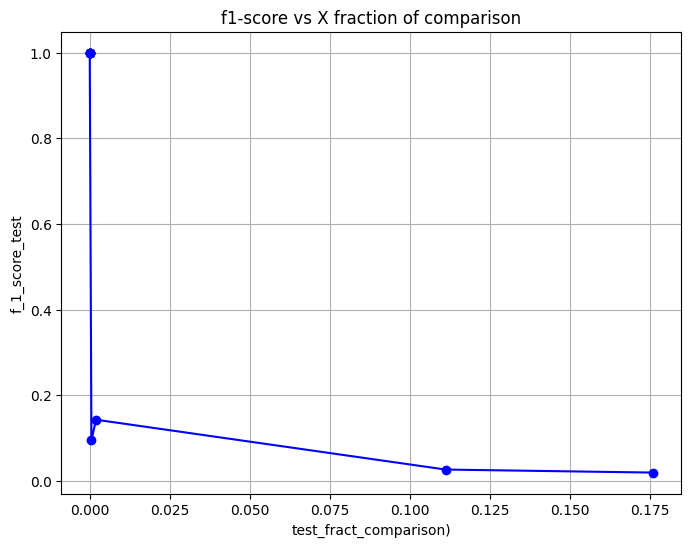

,b,r,t,len(candidate_pairs_test),n_found_pairs_test,f_1_score_test,test_fract_comparison
0,32.0,50.0,0.933033,8.0,2.0,1.000000,0.000024
1,40.0,40.0,0.911903,8.0,2.0,1.000000,0.000024
2,50.0,32.0,0.884926,8.0,2.0,1.000000,0.000024
3,64.0,25.0,0.846745,12.0,2.0,1.000000,0.000036
4,80.0,20.0,0.803240,12.0,2.0,1.000000,0.000036
5,100.0,16.0,0.749894,21.0,2.0,1.000000,0.000063
6,160.0,10.0,0.601988,200.0,7.0,0.095238,0.000597
7,200.0,8.0,0.515669,682.0,15.0,0.142857,0.002036
8,320.0,5.0,0.315479,37261.0,75.0,0.026490,0.111236
9,400.0,4.0,0.223607,58999.0,89.0,0.019417,0.176132


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# data_msm = [[[32, 50.0, 0.9330329915368074, 1, 0, 0, 8.45015675040772e-06], [40, 40.0, 0.9119026971211976, 1, 0, 0, 8.45015675040772e-06], [50, 32.0, 0.8849264728778423, 1, 0, 0, 8.45015675040772e-06], [64, 25.0, 0.8467453123625271, 1, 0, 0, 8.45015675040772e-06], [80, 20.0, 0.8032403202953746, 4, 0, 0, 3.380062700163088e-05], [100, 16.0, 0.7498942093324559, 9, 0, 0, 7.605141075366947e-05], [160, 10.0, 0.6019882323092768, 78, 8, 0, 0.0006591122265318022], [200, 8.0, 0.5156692688606229, 324, 16, 0, 0.0027378507871321013], [320, 5.0, 0.3154786722400966, 6258, 79, 0, 0.052881080944051514]], [[32, 50.0, 0.9330329915368074, 1, 0, 0, 8.45015675040772e-06], [40, 40.0, 0.9119026971211976, 1, 0, 0, 8.45015675040772e-06], [50, 32.0, 0.8849264728778423, 1, 0, 0, 8.45015675040772e-06], [64, 25.0, 0.8467453123625271, 1, 0, 0, 8.45015675040772e-06], [80, 20.0, 0.8032403202953746, 4, 0, 0, 3.380062700163088e-05], [100, 16.0, 0.7498942093324559, 9, 0, 0, 7.605141075366947e-05], [160, 10.0, 0.6019882323092768, 78, 8, 0, 0.0006591122265318022], [200, 8.0, 0.5156692688606229, 324, 16, 0, 0.0027378507871321013], [320, 5.0, 0.3154786722400966, 6258, 79, 0, 0.052881080944051514]], [[32, 50.0, 0.9330329915368074, 8, 3, 0, 6.760125400326176e-05], [40, 40.0, 0.9119026971211976, 8, 3, 0, 6.760125400326176e-05], [50, 32.0, 0.8849264728778423, 8, 3, 0, 6.760125400326176e-05], [64, 25.0, 0.8467453123625271, 8, 3, 0, 6.760125400326176e-05], [80, 20.0, 0.8032403202953746, 9, 3, 0, 7.605141075366947e-05], [100, 16.0, 0.7498942093324559, 13, 4, 0, 0.00010985203775530036], [160, 10.0, 0.6019882323092768, 79, 17, 0, 0.0006675623832822099], [200, 8.0, 0.5156692688606229, 230, 28, 0, 0.0019435360525937755], [320, 5.0, 0.3154786722400966, 7546, 100, 0, 0.06376488283857666]], [[32, 50.0, 0.9330329915368074, 7, 2, 0, 5.915109725285404e-05], [40, 40.0, 0.9119026971211976, 7, 2, 0, 5.915109725285404e-05], [50, 32.0, 0.8849264728778423, 7, 2, 0, 5.915109725285404e-05], [64, 25.0, 0.8467453123625271, 7, 2, 0, 5.915109725285404e-05], [80, 20.0, 0.8032403202953746, 7, 2, 0, 5.915109725285404e-05], [100, 16.0, 0.7498942093324559, 10, 2, 0, 8.45015675040772e-05], [160, 10.0, 0.6019882323092768, 88, 10, 0, 0.0007436137940358793], [200, 8.0, 0.5156692688606229, 298, 25, 0, 0.0025181467116215006], [320, 5.0, 0.3154786722400966, 4751, 82, 0, 0.04014669472118708]]]
# data 1600
# data_msm = [[[32, 50.0, 0.9330329915368074, 4, 3, 0, 3.380062700163088e-05], [40, 40.0, 0.9119026971211976, 5, 4, 0, 4.22507837520386e-05], [50, 32.0, 0.8849264728778423, 7, 5, 0, 5.915109725285404e-05], [64, 25.0, 0.8467453123625271, 6, 5, 0, 5.070094050244632e-05], [80, 20.0, 0.8032403202953746, 10, 5, 0, 8.45015675040772e-05], [100, 16.0, 0.7498942093324559, 12, 6, 0, 0.00010140188100489264], [160, 10.0, 0.6019882323092768, 93, 15, 0.14285714285714285, 0.0007858645777879179], [200, 8.0, 0.5156692688606229, 368, 30, 0.21621621621621623, 0.003109657684150041], [320, 5.0, 0.3154786722400966, 4692, 94, 0.11224489795918367, 0.03964813547291302]]]
# data_msm = [[[24, 50.0, 0.9384168022361221, 3, 2, 0, 2.535047025122316e-05], [25, 48.0, 0.9351391726482042, 4, 3, 0, 3.380062700163088e-05], [30, 40.0, 0.9184847895688368, 4, 3, 0, 3.380062700163088e-05], [40, 30.0, 0.8842966917779722, 6, 5, 0, 5.070094050244632e-05], [48, 25.0, 0.8565453278488625, 6, 5, 0, 5.070094050244632e-05], [50, 24.0, 0.8495903740312707, 6, 5, 0, 5.070094050244632e-05], [60, 20.0, 0.8148777083445052, 11, 5, 0, 9.295172425448492e-05], [75, 16.0, 0.7634993489084209, 13, 5, 0, 0.00010985203775530036], [80, 15.0, 0.7466676476550782, 16, 7, 0, 0.00013520250800652352], [100, 12.0, 0.6812920690579612, 28, 7, 0.5, 0.00023660438901141617], [120, 10.0, 0.6195578662541357, 63, 12, 0.47058823529411764, 0.0005323598752756864], [150, 8.0, 0.5345503184639215, 209, 27, 0.08, 0.0017660827608352134], [200, 6.0, 0.41351855420001377, 1084, 54, 0.1492537313432836, 0.009159969917441968], [240, 5.0, 0.3341625309791344, 3084, 84, 0.025641025641025644, 0.026060283418257408]]]
# data_msm= [[[28, 50.0, 0.9355281057090179, 3, 2, 0, 2.535047025122316e-05], [35, 40.0, 0.9149519748953608, 6, 5, 0, 5.070094050244632e-05], [40, 35.0, 0.8999675644278949, 6, 5, 0, 5.070094050244632e-05], [50, 28.0, 0.8696059444654058, 6, 5, 0, 5.070094050244632e-05], [56, 25.0, 0.8512800955300127, 7, 5, 0, 5.915109725285404e-05], [70, 20.0, 0.8086211529882631, 9, 5, 0, 7.605141075366947e-05], [100, 14.0, 0.719685673001152, 18, 7, 0, 0.00015210282150733895], [140, 10.0, 0.6100805738488102, 87, 10, 0.3333333333333333, 0.0007351636372854716], [175, 8.0, 0.5243487583203693, 250, 21, 0.1818181818181818, 0.00211253918760193], [200, 7.0, 0.4691172785435415, 587, 43, 0.2448979591836735, 0.004960242012489332], [280, 5.0, 0.3240174454577801, 5753, 98, 0.02352941176470588, 0.04861375178509561], [350, 4.0, 0.23119742295813955, 19203, 115, 0.010638297872340425, 0.16226836007807946]]]
# data_msm = [[[25, 40.0, 0.9226808345905884, 4, 3, 0, 3.380062700163088e-05], [40, 25.0, 0.8628148284692875, 6, 5, 0, 5.070094050244632e-05], [50, 20.0, 0.8223401594268891, 7, 6, 0, 5.915109725285404e-05], [100, 10.0, 0.6309573444801932, 63, 14, 0.18181818181818182, 0.0005323598752756864], [125, 8.0, 0.5468727057042105, 240, 26, 0.21428571428571427, 0.0020280376200978527], [200, 5.0, 0.3465724215775732, 3360, 77, 0.02531645569620253, 0.02839252668136994], [250, 4.0, 0.2514866859365871, 15601, 105, 0.008264462809917356, 0.13183089546311083]]]
# data k = 1500
# data_msm = [[[30, 50.0, 0.9342381005179308, 2, 1, 0, 1.690031350081544e-05], [50, 30.0, 0.8777435898906345, 4, 3, 0, 3.380062700163088e-05], [60, 25.0, 0.8489340439065296, 6, 5, 0, 5.070094050244632e-05], [75, 20.0, 0.8058365040084581, 10, 6, 0, 8.45015675040772e-05], [100, 15.0, 0.7356422544596414, 16, 6, 0.5, 0.00013520250800652352], [125, 12.0, 0.668740304976422, 32, 8, 0, 0.00027040501601304705], [150, 10.0, 0.6058859394184564, 107, 14, 0, 0.000904166772293626], [250, 6.0, 0.3984220189658448, 1407, 64, 0.13138686131386862, 0.011889370547823663], [300, 5.0, 0.3195771718380609, 5242, 95, 0.017699115044247787, 0.044295721685637265], [375, 4.0, 0.22724387329349988, 19292, 116, 0.007843137254901962, 0.16302042402886574]]]
# data msm k = 1600 with replacekent
data_msm = [[[32, 50.0, 0.9330329915368074, 8, 2, 1.0, 2.3882664469461535e-05], [40, 40.0, 0.9119026971211976, 8, 2, 1.0, 2.3882664469461535e-05], [50, 32.0, 0.8849264728778423, 8, 2, 1.0, 2.3882664469461535e-05], [64, 25.0, 0.8467453123625271, 12, 2, 1.0, 3.58239967041923e-05], [80, 20.0, 0.8032403202953746, 12, 2, 1.0, 3.58239967041923e-05], [100, 16.0, 0.7498942093324559, 21, 2, 1.0, 6.269199423233653e-05], [160, 10.0, 0.6019882323092768, 200, 7, 0.09523809523809522, 0.0005970666117365384], [200, 8.0, 0.5156692688606229, 682, 15, 0.14285714285714285, 0.0020359971460215958], [320, 5.0, 0.3154786722400966, 37261, 75, 0.026490066225165563, 0.11123649509957578], [400, 4.0, 0.22360679774997896, 58999, 89, 0.01941747572815534, 0.17613166512922016]]]

def save_plot_msm(df):
    x_values = df["test_fract_comparison"]
    y_values = df["f_1_score_test"]
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.xlabel('test_fract_comparison)')
    plt.ylabel('f_1_score_test')
    plt.title('f1-score vs X fraction of comparison')
    plt.grid(True)
    plt.savefig('msm_f1_vs_FC_plot.png')
    plt.show()

def_create_plot()
    

def bootstrap_msm_results_data(data):
    mean_data = [
        np.mean([run[i] for run in data], axis=0)  # Compute the mean for each index across all runs
        for i in range(len(data[0]))              # Loop through the number of arrays in a single run
    ]

    # Convert the result into a 10x7 list by slicing only the first 7 elements of each array
    mean_data_10x10 = [list(arr[:7]) for arr in mean_data]

    # Output the result
    print(mean_data_10x10)
    df = pd.DataFrame(mean_data_10x10, columns=[
        "b", "r", "t", "len(candidate_pairs_test)", 
        "n_found_pairs_test", "f_1_score_test", "test_fract_comparison"
    ])

    # Display the dataframe
    df.to_excel("n_bootstrap_1 MSM good i hope results.xlsx", index = False)

    save_plot_msm(df)

    return df

bootstrap_msm_results_data(data_msm)


In [1]:
for i in range(1):
    print(i)

0
